In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'

In [2]:
df = pd.read_csv("student-performance.csv")

In [3]:
df.head().T

,0,1,2,3,4
gender,female,female,female,male,male
race/ethnicity,'group B','group C','group B','group A','group C'
parental level of education,'bachelor\'s degree','some college','master\'s degree','associate\'s degree','some college'
lunch,standard,standard,standard,free/reduced,standard
test preparation course,none,completed,none,none,none
math score,72,69,90,47,76
reading score,72,90,95,57,78
writing score,74,88,93,44,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [7]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [8]:
df['parental level of education'].value_counts()

'some college'           226
'associate\'s degree'    222
'high school'            196
'some high school'       179
'bachelor\'s degree'     118
'master\'s degree'        59
Name: parental level of education, dtype: int64

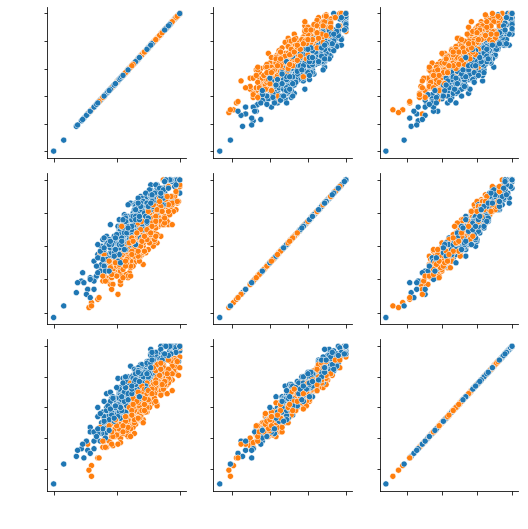

In [9]:
g = sns.PairGrid(df, vars=['math score', 'reading score', 'writing score'], hue="gender")
g.map(sns.scatterplot)

<AxesSubplot:xlabel='count', ylabel='parental level of education'>

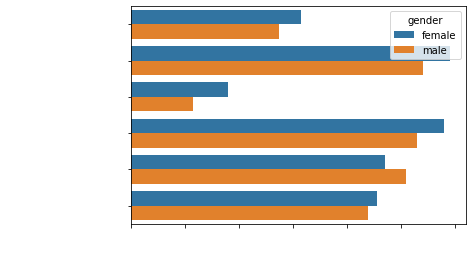

In [10]:
sns.countplot(data = df, y= 'parental level of education', hue='gender')

<AxesSubplot:xlabel='count', ylabel='test preparation course'>

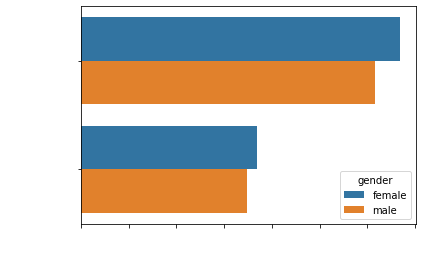

In [11]:
sns.countplot(data = df, y= 'test preparation course', hue='gender')

<AxesSubplot:xlabel='count', ylabel='lunch'>

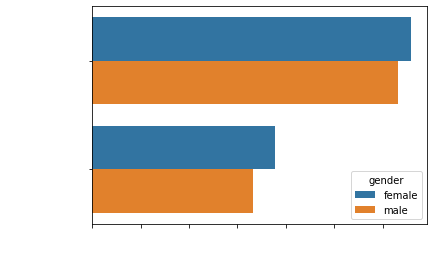

In [12]:
sns.countplot(data = df, y= 'lunch', hue='gender')

In [13]:
df['race/ethnicity'].value_counts()

'group C'    319
'group D'    262
'group B'    190
'group E'    140
'group A'     89
Name: race/ethnicity, dtype: int64

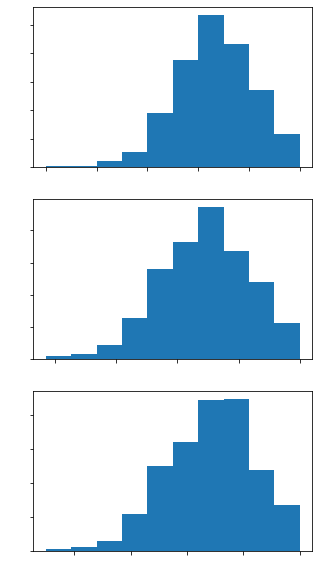

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
for ax, feature in zip(axes, ['math score', 'reading score', 'writing score']):
    ax.hist(df[feature])

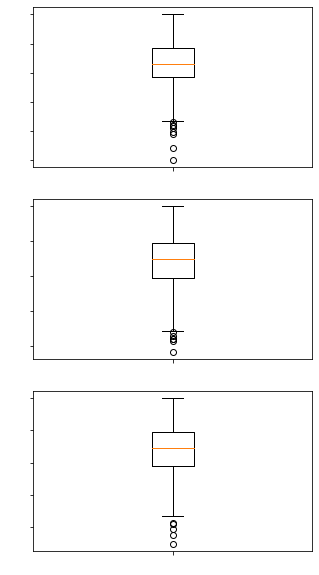

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
for ax, feature in zip(axes, ['math score', 'reading score', 'writing score']):
    ax.boxplot(df[feature])

In [30]:
# gets rid of lower outliers by nixing all values less than 3 standard deviations
# away from the mean.
for col in ['math score', 'reading score', 'writing score']:
    df = df.drop(
        index=df[(np.abs(stats.zscore(df[col])) >= 3)].index
        )

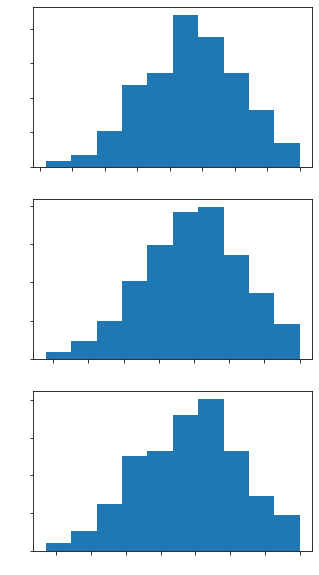

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
for ax, feature in zip(axes, ['math score', 'reading score', 'writing score']):
    ax.hist(df[feature])

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [38]:
standard_scaler = StandardScaler()
column_trans = ColumnTransformer(transformers=[
    ('standard', standard_scaler, ['math score', 'reading score', 'writing score'])
])
column_trans.fit(df.drop(columns=['gender']))

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['math score', 'reading score',
                                  'writing score'])])

In [39]:
column_trans.transform(df)

array([[ 0.38070496,  0.17830792,  0.38175502],
       [ 0.17599015,  1.44755352,  1.33337029],
       [ 1.60899387,  1.80012174,  1.67323288],
       ...,
       [-0.50639258,  0.10779427, -0.22999765],
       [ 0.10775187,  0.60138978,  0.58567258],
       [ 0.72189632,  1.16549894,  1.19742525]])